In [18]:
import pandas as pd
import numpy as np

datapath = "data/data.csv"
df = pd.read_csv(datapath)

# 2) Quick inspection of the data
print("Shape:",df.shape)
display(df.head())
df.info()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# 3) Target check (before changes)
if "Churn" in df.columns:
    print("\nChurn distribution (raw):")
    print(df["Churn"].value_counts(dropna=False))
    print("\nChurn % (raw):")
    print(df["Churn"].value_counts(normalize=True, dropna=False) * 100)





Churn distribution (raw):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn % (raw):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [15]:
if "customerID" in df.columns:
    df.drop(columns=["customerID"])

In [16]:
#5) Fix TotalCharges (common issue: object with blanks)
if "TotalCharges" in df.columns:
    # convert blanks to NaN, then to numeric
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].astype(str).str.strip(), errors="coerce")


In [17]:
# 6) Check missing values AFTER fixing TotalCharges
print("\nMissing values per column (after TotalCharges fix):")
print(df.isna().sum().sort_values(ascending=False).head(10))


Missing values per column (after TotalCharges fix):
TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
dtype: int64


In [19]:

# 7) Decide how to handle missing TotalCharges
# Hint: In Telco, missing TotalCharges usually happens when tenure=0.
# We'll fill missing TotalCharges with 0 (simple + defensible), but you can also drop those rows.
if "TotalCharges" in df.columns:
    missing_tc = df["TotalCharges"].isna().sum()
    print(f"\nMissing TotalCharges rows: {missing_tc}")
    df["TotalCharges"] = df["TotalCharges"].fillna(0)


Missing TotalCharges rows: 0


In [20]:

# 8) Convert target to 0/1
# Yes -> 1, No -> 0
if "Churn" in df.columns and df["Churn"].dtype == "object":
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

    


In [22]:

# 9) Final sanity checks
print("\nFINAL Shape:", df.shape)
print("\nFINAL churn rate (%):")
print(df["Churn"].mean() * 100)

print("\nDtypes summary:")
display(df.dtypes.value_counts())

print("\nAny missing left?")
print(df.isna().sum().sort_values(ascending=False).head(10))


FINAL Shape: (7043, 21)

FINAL churn rate (%):
26.536987079369588

Dtypes summary:


object     17
int64       3
float64     1
Name: count, dtype: int64


Any missing left?
customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
dtype: int64


In [24]:
# 10) Identify numeric vs categorical columns (initial guess)
target_col = "Churn"
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Remove target from numeric list if present
if target_col in num_cols:
    num_cols.remove(target_col)

print("\nNumeric columns:", num_cols)
print("\nCategorical columns:", cat_cols)


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


## Phase 2

In [25]:
# Churn rate by Contract
contract_churn = df.groupby("Contract")["Churn"].mean().sort_values(ascending=False)
print(contract_churn)


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


In [26]:
df.groupby("Churn")["tenure"].mean()


Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

In [27]:
df["tenure_group"] = pd.cut(df["tenure"], bins=[0,12,24,48,72])
df.groupby("tenure_group")["Churn"].mean()


/var/folders/vd/vwrhkdg163sdh9ttw0_hbsyr0000gn/T/ipykernel_85806/2228006984.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["Churn"].mean()


tenure_group
(0, 12]     0.476782
(12, 24]    0.287109
(24, 48]    0.203890
(48, 72]    0.095132
Name: Churn, dtype: float64

In [28]:
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

In [29]:
df.groupby("SeniorCitizen")["Churn"].mean()


SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

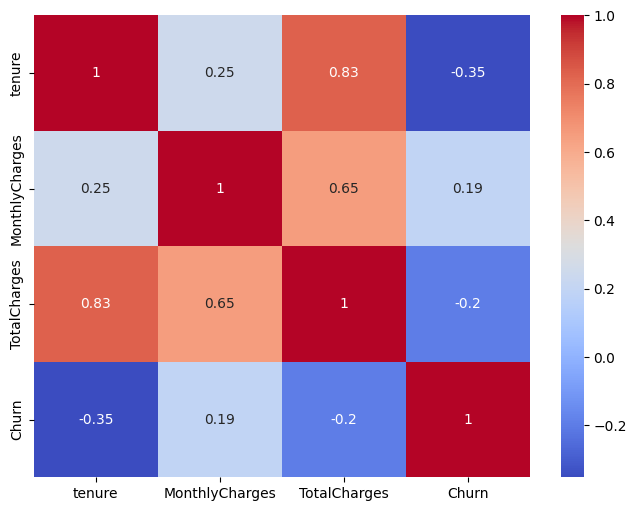

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure TotalCharges is numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

corr = df[["tenure","MonthlyCharges","TotalCharges","Churn"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()



In [35]:
df.groupby("Contract")["Churn"].mean().sort_values(ascending=False)


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

## Phase 3

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# 1) Features/target
y = df["Churn"]
X = df.drop(columns=["Churn", "tenure_group"], errors="ignore") 

In [38]:
# 2) Column types
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()


# SeniorCitizen: treat as categorical even though it's 0/1 numeric
if "SeniorCitizen" in num_cols:
    num_cols.remove("SeniorCitizen")
    cat_cols.append("SeniorCitizen")

print("Num cols:", num_cols)
print("Cat cols:", cat_cols)

Num cols: ['tenure', 'MonthlyCharges', 'TotalCharges']
Cat cols: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [39]:

# 3) Split (stratify important for churn imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
# 4) Preprocess
numeric_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_tf = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ]
)

In [41]:
# 5) Model pipeline
clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])

In [42]:
# 6) Train
clf.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [47]:

# 7) Predict + evaluate
proba = clf.predict_proba(X_test)[:, 1]
pred = (proba >= 0.4).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, proba))
print("\nConfusion matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification report:\n", classification_report(y_test, pred))

ROC-AUC: 0.8418455656307319

Confusion matrix:
 [[848 187]
 [125 249]]

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.67      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [46]:
import numpy as np
from sklearn.metrics import classification_report

for t in [0.5, 0.4, 0.3]:
    pred_t = (proba >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, pred_t))



Threshold: 0.5
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.67      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79   

## Phase 4 value model(Regression)

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df["Value"] = df["MonthlyCharges"] * df["tenure"]
y_value = df["Value"]


In [49]:
X_value = df.drop(columns=["Churn", "Value", "TotalCharges", "tenure_group"], errors="ignore")


In [53]:


Xv_train, Xv_test, yv_train, yv_test = train_test_split(
    X_value,
    y_value,
    test_size=0.2,
    random_state=42
)


In [56]:


num_cols_v = Xv_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_v = Xv_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Move SeniorCitizen to categorical
if "SeniorCitizen" in num_cols_v:
    num_cols_v.remove("SeniorCitizen")
    cat_cols_v.append("SeniorCitizen")

print("Numeric columns:", num_cols_v)
print("Categorical columns:", cat_cols_v)

Numeric columns: ['tenure', 'MonthlyCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [57]:
# 5) Preprocessing
numeric_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_tf = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_v = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols_v),
        ("cat", categorical_tf, cat_cols_v),
    ]
)

In [58]:
# 6) Regression model pipeline
reg = Pipeline(steps=[
    ("preprocess", preprocessor_v),
    ("model", LinearRegression())
])


In [59]:
# 7) Train
reg.fit(Xv_train, yv_train)

# 8) Predict + evaluate
pred_value = reg.predict(Xv_test)

mae = mean_absolute_error(yv_test, pred_value)
rmse = np.sqrt(mean_squared_error(yv_test, pred_value))

print("\nValue Model Evaluation (Linear Regression)")
print("MAE:", mae)
print("RMSE:", rmse)


Value Model Evaluation (Linear Regression)
MAE: 566.5446288206666
RMSE: 700.4756137081441


## Phase 5 segmentation

In [60]:
value_threshold = df["Value"].median()
print("Value threshold (median):", value_threshold)


Value threshold (median): 1393.6000000000001


In [62]:
proba = clf.predict_proba(X_test)[:, 1]
pred_value = reg.predict(Xv_test)
value_pred_test = reg.predict(X_test.drop(columns=["TotalCharges"], errors="ignore"))



In [63]:
def segment_customer(churn_prob, value, churn_threshold, value_threshold):
    
    if value >= value_threshold and churn_prob >= churn_threshold:
        return "High Value - At Risk"
    
    elif value >= value_threshold and churn_prob < churn_threshold:
        return "High Value - Loyal"
    
    elif value < value_threshold and churn_prob >= churn_threshold:
        return "Low Value - At Risk"
    
    else:
        return "Low Value - Stable"


In [64]:
segments = []

for p, v in zip(proba, value_pred_test):
    seg = segment_customer(p, v, 0.4, value_threshold)
    segments.append(seg)

pd.Series(segments).value_counts()


High Value - Loyal      587
Low Value - Stable      386
Low Value - At Risk     288
High Value - At Risk    148
Name: count, dtype: int64